In [378]:
### imports
import numpy as np
import matplotlib.pyplot as plt
import itertools
import copy


In [379]:
### definitions
size_of_grid = 100
number_of_iterations = 100

### Exercise a)
Use the Jacobi method on a 100x100 grid first with nested loops and then using the checkerboard implementation with either the numpy or the convolution way shown in the exercise class. Note duration and the number of iterations needed to reach convergence. Make a contour and a color plot of the resulting potential.

In [380]:
### define the function we will use
def get_neighbours(i, j, size_of_grid):
    position = np.array([i, j])
    arrangements = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
    neighbours = []

    for a in arrangements:
        new_position = position + a

        # check if the position is out of bounds
        if(0 <= new_position[0] < size_of_grid and 0 <= new_position[1] < size_of_grid):
            neighbours.append(new_position)
    
    return neighbours

def calculate_new_grid_value(i, j, grid, size_of_grid):
    neighbours = get_neighbours(i, j, size_of_grid)
    # calculate the values of all the neighbours and then use this to 
    value_to_add = 0
    for neighbour in neighbours:
        value_to_add += grid[neighbour[0], neighbour[1]]

    new_value = 0.25 * value_to_add
    return new_value

def remove_coordinates_from_array(base_array, coordinates_to_remove):
    return [coord for coord in base_array if coord not in coordinates_to_remove]

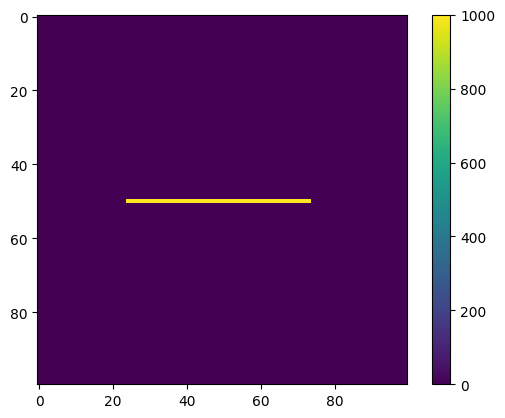

In [381]:
### initializing the grid
grid_jacobian_basic = np.zeros((size_of_grid, size_of_grid))
grid_jacobian_checkerboard = [] # we will create a copy of the basic board onto this later

### place the 100 volt stick in the middle,
# I will make the stick 50 grid positions long
center_row = int(size_of_grid / 2)
left_column_bounds = int(size_of_grid / 4) - 1
right_column_bounds = left_column_bounds + int(1/2 * size_of_grid)
grid_jacobian_basic[center_row, left_column_bounds:right_column_bounds] = 1000

# now copy the basic info to the checkerboard info
grid_jacobian_checkerboard = grid_jacobian_basic.copy()


# remove the outer bounds from the grid we loop over, since these values are grounded => always 0
bounds = []
for i in range(size_of_grid):
    bounds.append([0, i])
    bounds.append([i, 0])
    bounds.append([size_of_grid -1, i])
    bounds.append([i, size_of_grid -1])

# remove the center "stick" from the grid we loop over, since these values are fix => always 1000
stick = [(center_row, col) for col in range(left_column_bounds, right_column_bounds)]
excluded_coordinates = bounds + stick

plt.imshow(grid_jacobian_basic)
plt.colorbar()


Text(0.5, 1.0, 'Jacobi Implementation: w = 1, iterations: 100')

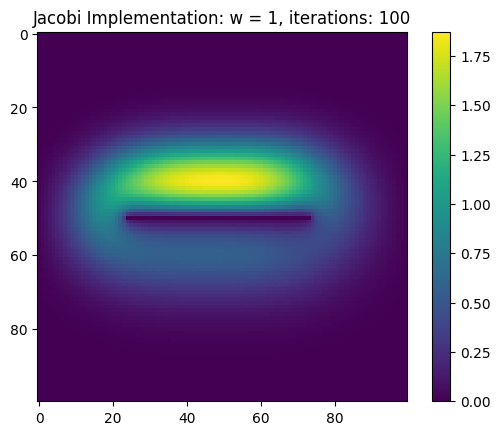

In [388]:
# first we run the jacobian with no w value and simply iterate over each of the points sequentialy

# we only iterate over the "ungiven" positions, not the fixed one since we don't want to change them
iterations = [coord for coord in iterations.copy() if coord not in excluded_coordinates.copy()]


change_matrix = np.zeros_like(grid_jacobian_basic)
difference_matrix = np.zeros_like(grid_jacobian_basic)
updated_grid = np.zeros_like(grid_jacobian_basic)

difference = 1
for i in range(number_of_iterations):
    
    # update the change matrix
    for coord in iterations:
        updated_grid[coord[0], coord[1]] = calculate_new_grid_value(coord[0], coord[1], grid_jacobian_basic, size_of_grid)


    # calculate the difference
    difference_matrix = grid_jacobian_basic - change_matrix

    # get the maximal change
    difference_matrix
    diff = np.max(np.abs(difference_matrix))

    
    break



# Plot the calculates grid
plt.imshow(grid_jacobian_basic, cmap='viridis')
plt.colorbar()
plt.title(f"Jacobi Implementation: w = 1, iterations: {number_of_iterations}")

Now we do the same thing using the checkerboard implementation

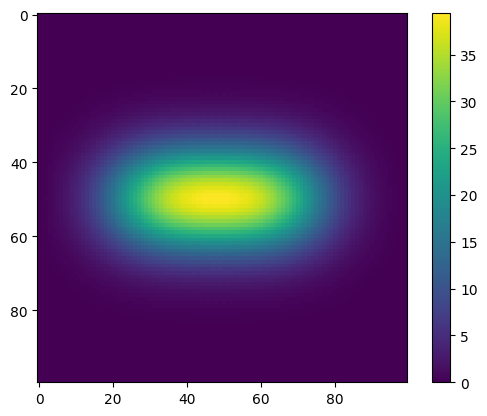

In [383]:
# first we need to define our two checkerboard lists, create full list, remove every odd element
val1 = np.indices((size_of_grid, size_of_grid)).sum(axis=0) % 2
checkerboard_1 = [[i, j] for i, row in enumerate(val1) for j, value in enumerate(row) if value == 1]
checkerboard_2 = [[i, j] for i, row in enumerate(val1) for j, value in enumerate(row) if value == 0]

# now we remove all bounds from both our checkerboards
checkerboard_1 = [coord for coord in checkerboard_1.copy() if coord not in excluded_coordinates.copy()]
checkerboard_2 = [coord for coord in checkerboard_2.copy() if coord not in excluded_coordinates.copy()]


for iteration in range(number_of_iterations):
    # update the positions of the first checkerboard
    for pattern in (checkerboard_1, checkerboard_2):
            for coord in pattern:
                grid_jacobian_checkerboard[coord[0], coord[1]] = calculate_new_grid_value(coord[0], coord[1], grid_jacobian_checkerboard, size_of_grid)


#plt.imshow(grid_jacobian_checkerboard, cmap='viridis')
plt.imshow(grid_jacobian_checkerboard, cmap='viridis')
plt.colorbar()